<a href="https://colab.research.google.com/github/Madhurihawaldar55/ML-Case-Study/blob/main/ML_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ML Case study: EDA and Building ML Model for Diabetes Prediction


##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Name**    - Madhuri Hawaldar

**Problem Statement:**
#####Imagine yourself as a freelance data scientist ready for the next project adventure. Your task is to select a machine learning project from the list provided or propose an original project idea that resonates with you. Your objective is to identify a specific challenge within the chosen industry domain and design a machine-learning solution to address it. Whether you're predicting customer behavior, optimizing processes, or making healthcare more efficient, your project should demonstrate your ability to approach complex problems, preprocess and analyze relevant data, develop and fine-tune models, and interpret results in a meaningful way. Your project will be a testament to your adaptability, curiosity, and aptitude for machine learning.
Execute an end-to-end data science project by following the below steps:


**About Data :**
##### For my ML Case Study Project I have choosen the dataset of DIABETES from PIMA INDIAN DIABETES DATABASE
#####The Diabetes Dataset contains information about individuals diagnosed with diabetes, including demographic attributes, medical history, and clinical measurements. This dataset serves as a valuable resource for studying diabetes management, risk factors, and predictive modeling for disease outcomes.
#####Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high.The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
##### In particular all patients here are females at least 21 years old of Pima Indiann Heritage. We will explore this dataset and find out factors that contribute the most for diabetes causation. We will also build a machine learning models that can help to predict whether a person is diabetic or not.
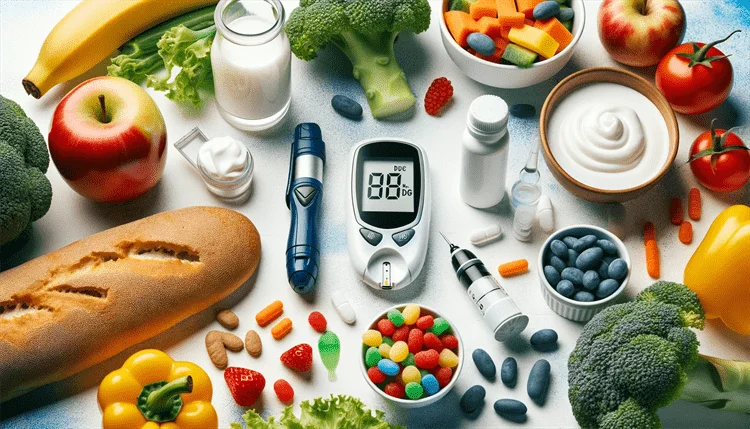

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#Data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

#Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
#Warnings libraries
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

In [5]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Number of rows:{len(diabetes_data.axes[0])}")
print(f"Number of columns:{len(diabetes_data.axes[1])}")

Number of rows:768
Number of columns:9


### Dataset Information

In [7]:
# Dataset Info
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


####Duplicate Values

In [8]:
# Dataset Duplicate value count
diabetes_data.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [10]:
# Available columns
print(f"Available columns:\n{diabetes_data.columns.to_list()}")

Available columns:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [11]:
#Dataset Describe
diabetes_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2. Variable Description

1. Pregnancies: To express the Number of times pregnant

2. Glucose: To express Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. BloodPressure: To express Diastolic blood pressure (mm Hg)

4. SkinThickness: To express the Triceps skin fold thickness (mm)

5. Insulin: To express the 2-Hour serum insulin (mu U/ml)

6. BMI: To express the Body mass index (weight in kg/(height in m)^2)

7. DiabetesPedigreeFunction: To express Diabetes pedigree function the Diabetes percentage

8. Age: To express the age in years

9. Outcome: To express the final result 1 is YES o is NO




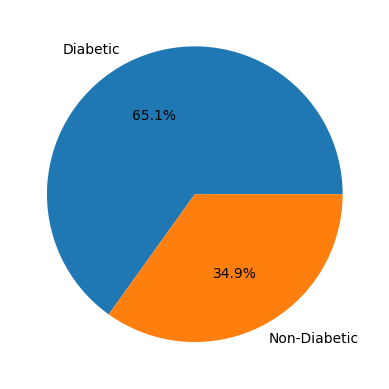

In [12]:
labels = ['Diabetic','Non-Diabetic']
diabetes_data.groupby('Outcome').size().plot(kind='pie',labels=labels,autopct='%1.1f%%')
plt.gca().spines[['top', 'right',]].set_visible(False)

 **The minimum and maximum values for each column, certain columns like Glucose or Insulin can not have values as 0. Therefore, we need to take care of such values.**

In [13]:
for col in diabetes_data.columns:
    print("The minimum value fore the columns {} is {}".format(col,diabetes_data[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 0
The minimum value fore the columns BloodPressure is 0
The minimum value fore the columns SkinThickness is 0
The minimum value fore the columns Insulin is 0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns DiabetesPedigreeFunction is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


Here we can see that the columns Glucose, BloodPressure, Skinthickness, Insulin, BMI have minimum value 0 but they aren't suppose to. So we replace 0 in those column as null value.

In [14]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [15]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

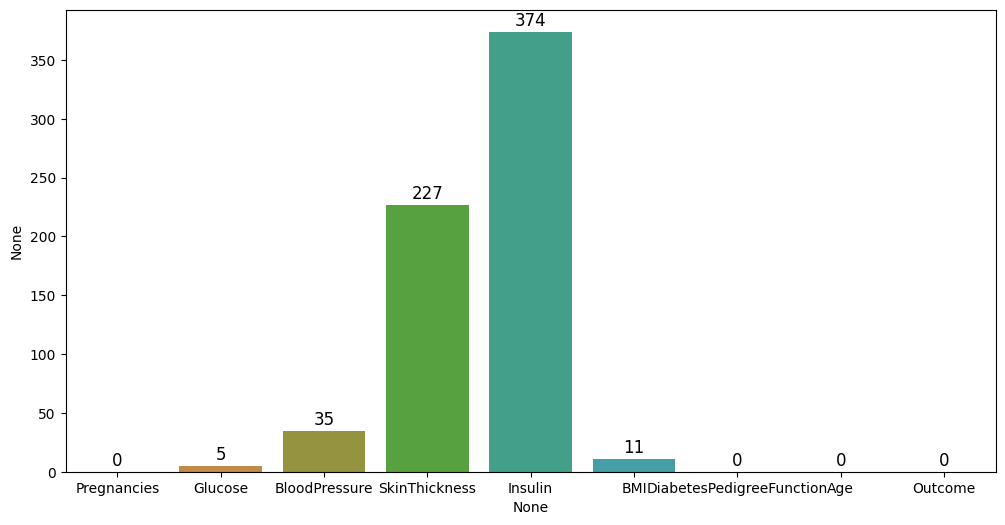

In [16]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
plots=sns.barplot(x=diabetes_data.columns,y=diabetes_data.isna().sum(),palette='husl')
for bar in plots.patches:
    plots.annotate(int(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

## 3. ***Data Wrangling***

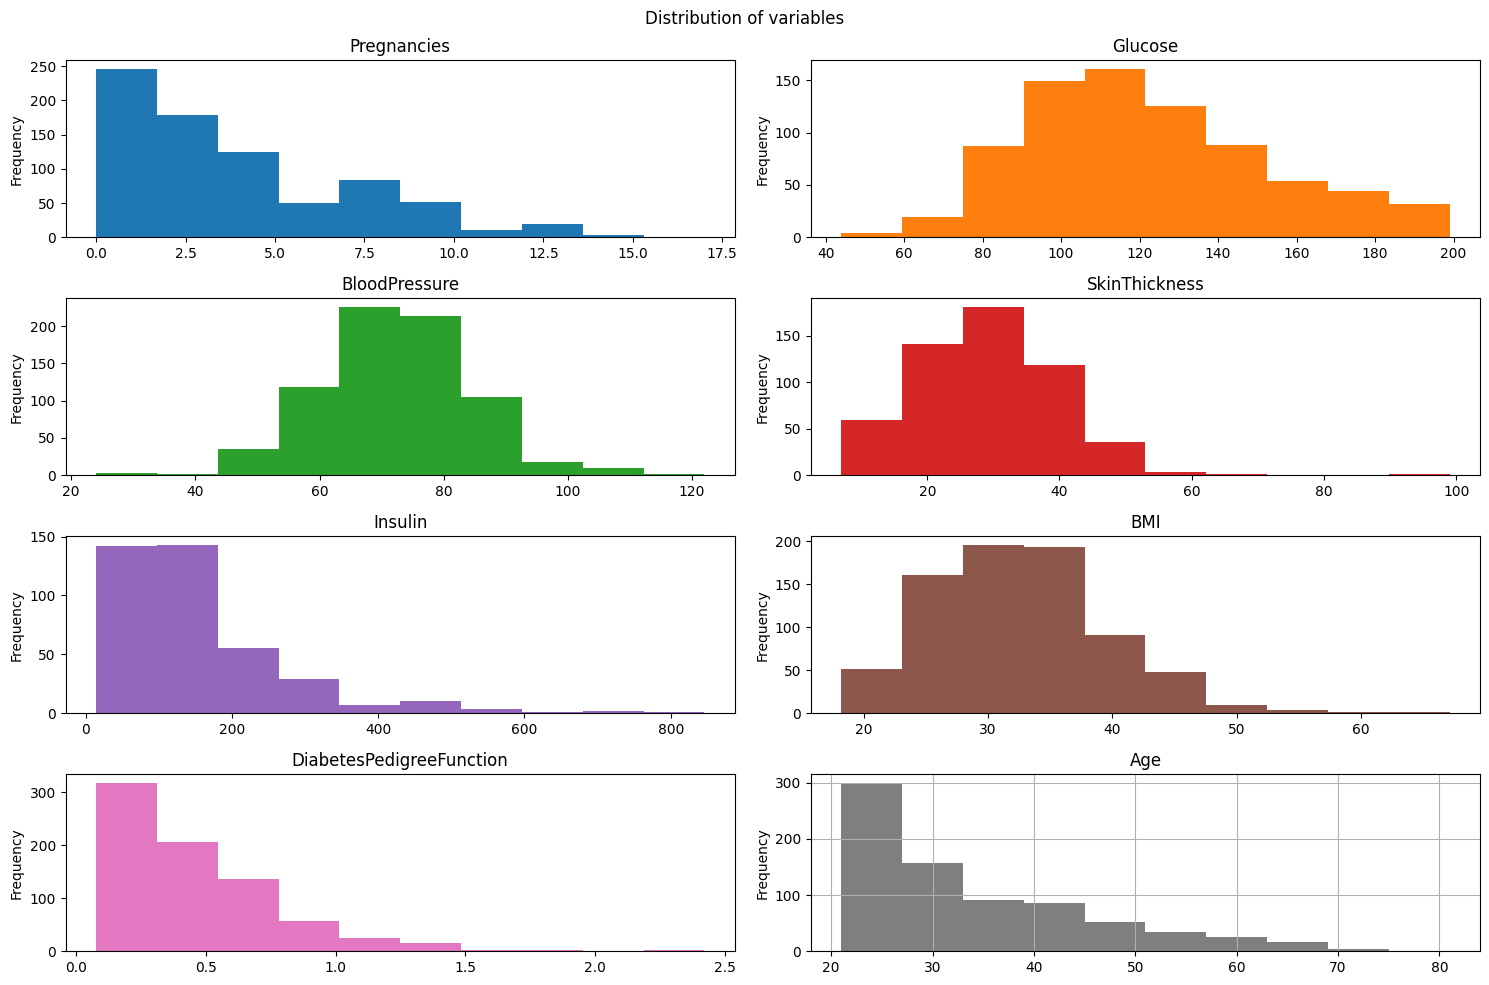

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = diabetes_data.drop('Outcome', axis = 1).columns
for col in columns:
    diabetes_data[col].plot(kind = 'hist', ax = axes[ax_idx], title = col,color=next(color_cycle))
    ax_idx += 1

plt.suptitle('Distribution of variables')
plt.tight_layout()
plt.grid()
plt.show()

**Let's check the skewness of each of the columns.**

Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. The peak of the histogram represents the mode.

In [18]:
for col in diabetes_data.drop('Outcome',axis=1).columns:
    print("The skewness for {}:  is {}".format(col,diabetes_data[col].skew()))

The skewness for Pregnancies:  is 0.9016739791518588
The skewness for Glucose:  is 0.5309885349396285
The skewness for BloodPressure:  is 0.13415273171959252
The skewness for SkinThickness:  is 0.690619013984192
The skewness for Insulin:  is 2.166463843812443
The skewness for BMI:  is 0.5939697505712673
The skewness for DiabetesPedigreeFunction:  is 1.919911066307204
The skewness for Age:  is 1.1295967011444805


Columns like Pregnancies, Glucose, BloodPressure, SkinThickness and BMI are not that much skewed. We can fill null values with the mean for these columns, but for columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness.

In [19]:
diabetes_data['Insulin']=diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median())
for col in ['BloodPressure','Glucose','SkinThickness','BMI']:
    diabetes_data[col]=diabetes_data[col].fillna(diabetes_data[col].mean())

In [20]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###**Relation Between Variables**

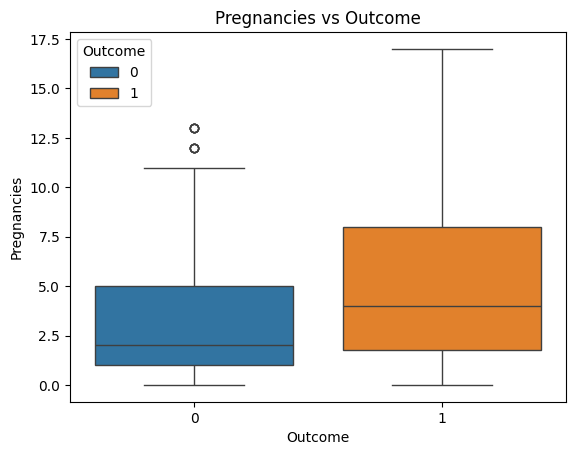

In [52]:

sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = diabetes_data, hue='Outcome')
plt.title('Pregnancies vs Outcome')
plt.show()

We can see that the number of pregnancies is high for the diabetic people

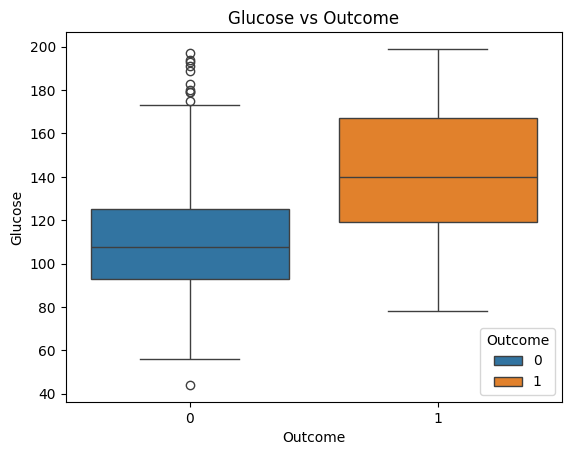

In [26]:
sns.boxplot(x = 'Outcome', y = 'Glucose', data = diabetes_data, hue='Outcome')
plt.title('Glucose vs Outcome')
plt.show()

The median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.

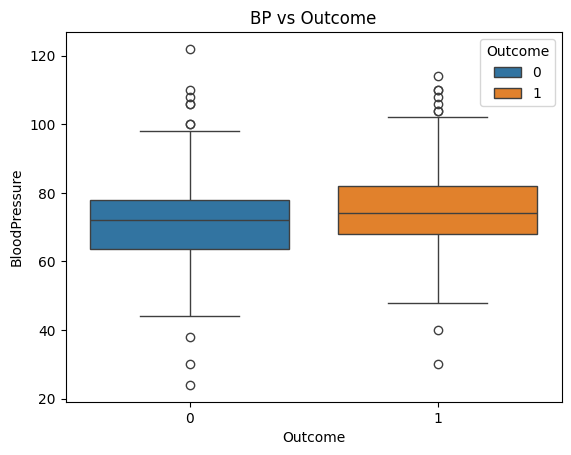

In [27]:
sns.boxplot(x='Outcome', y='BloodPressure',data=diabetes_data,hue='Outcome')
plt.title("BP vs Outcome")
plt.show()

The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.

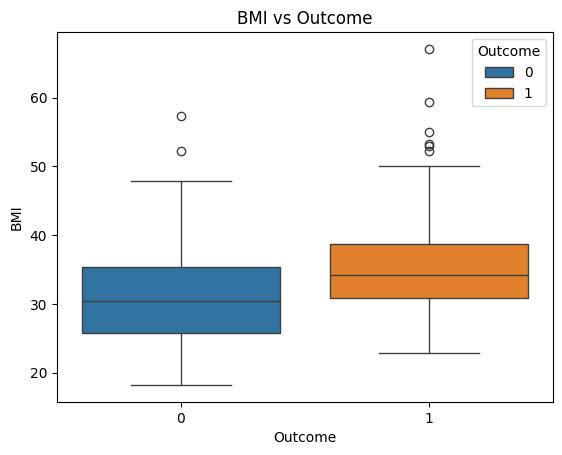

In [28]:
sns.boxplot(x = 'Outcome', y = 'BMI', data = diabetes_data,hue='Outcome')
plt.title('BMI vs Outcome')
plt.show()

the Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.

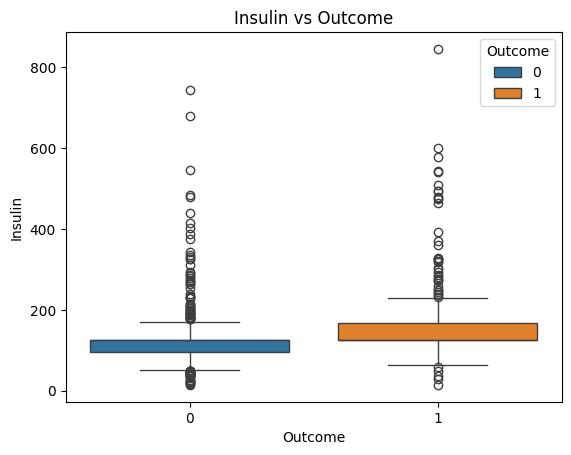

In [29]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = diabetes_data,hue='Outcome')
plt.title('Insulin vs Outcome')
plt.show()

The Insulin level more in diabetic people compare to non diabetic people.

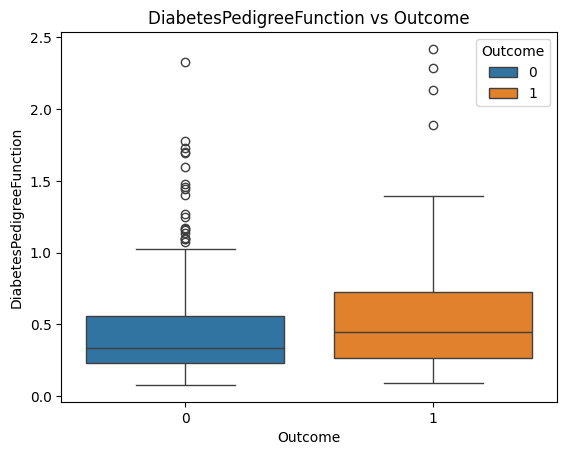

In [30]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=diabetes_data,hue='Outcome')
plt.title("DiabetesPedigreeFunction vs Outcome")
plt.show()

Quite a proportion of people having high DPF does not end up having Diabetes. But usually the diabetic people have DPF value close to 0.5 (50th Percentile)

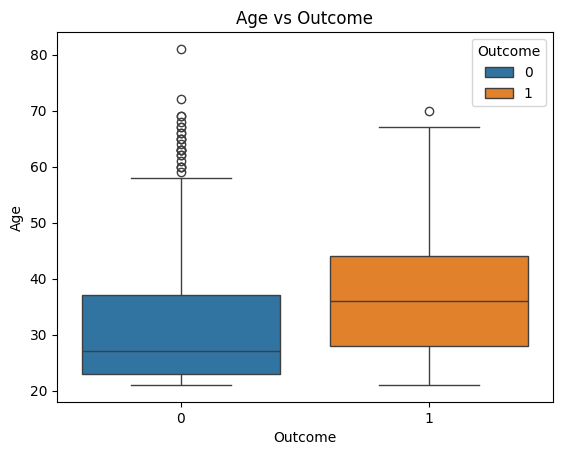

In [31]:
sns.boxplot(x = 'Outcome', y = 'Age', data = diabetes_data,hue='Outcome')
plt.title('Age vs Outcome')
plt.show()

The median of the age of diabetic people is greater than that of non-diabetic people.

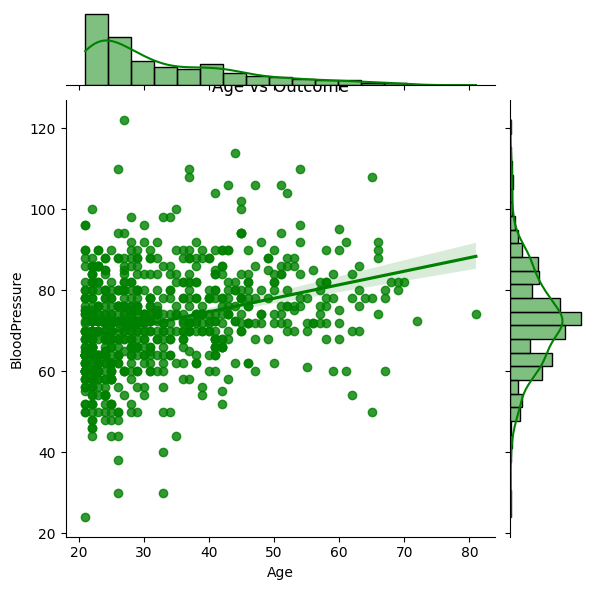

In [32]:
sns.jointplot(x = 'Age', y = 'BloodPressure', data = diabetes_data, kind='reg', color='green')
plt.title('Age vs Outcome')
plt.show()

As the age increases, generally the Blood Pressure also increases

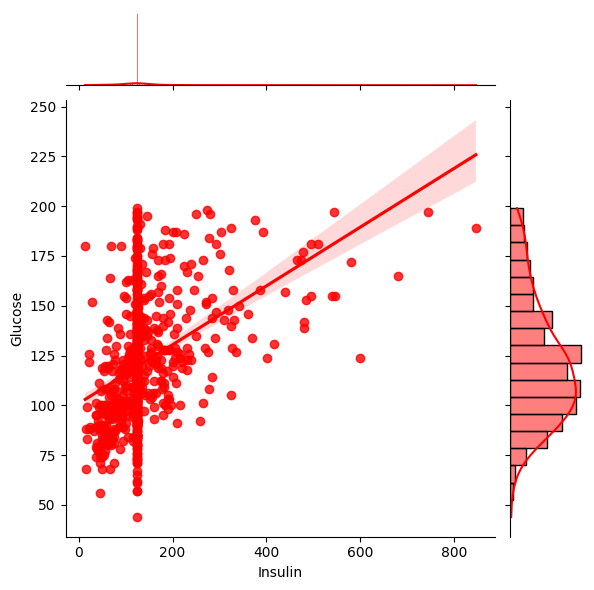

In [33]:
sns.jointplot(x='Insulin',y='Glucose', data=diabetes_data, kind = 'reg', color = 'red')
plt.show()

As the insulin level increases, the Glucose level also increases.

**Correlation Between Variables- Heatmap**

<Axes: >

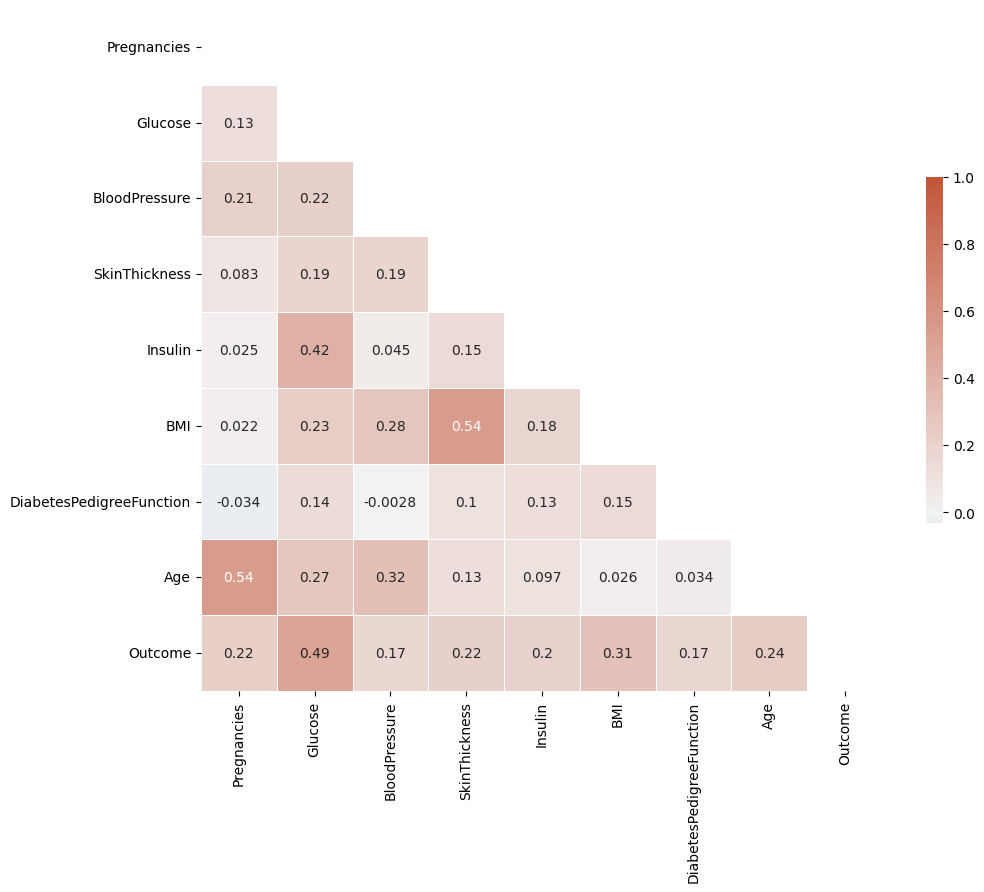

In [34]:
corr = diabetes_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

From the above heatmap, we can observe that all the features are weakly correlated, so that removes multicollinearity out of equation.

#**Dataset Splitting and Features Scaling**

In [35]:
from sklearn.model_selection import train_test_split

X = diabetes_data.drop('Outcome', axis = 1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

###**Standardization of dataset**

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

#####This can be thought of as subtracting the mean value or centering the data. Scaling the features is of utmost importance because different features are in different scales. Let's say the Age has values in double digits, whereas the DPF is of the kind float, the effect of the Age feature will be more as compared to the DPF

#####Best practice is to use only the training set to figure out how to scale / normalize, then blindly apply the same transform to the test set.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

#####**Baseline Models**

In [37]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 78.99%
_______________________________________________
F1 Score: 0.66
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803828    0.753165  0.789931    0.778496      0.786148
recall       0.896000    0.592040  0.789931    0.744020      0.789931
f1-score     0.847415    0.662953  0.789931    0.755184      0.783045
support    375.000000  201.000000  0.789931  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[336  39]
 [ 82 119]]


Test Result:
Accuracy Score: 72.40%
_______________________________________________
F1 Score: 0.56
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760870   0.629630  0.723958    0.695250      0.715072
recall       0.840000   0.507463  0.723958    0.673731      0.723958
f1-score 

The F1 score we got using Logistic Regression is very less, and in the Confusion Matrix it is visible that 53 wrong predictions has been made. We need to improve it.

In [39]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

###Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 67.71%
_______________________________________________
F1 Score: 0.52
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.740458   0.540984  0.677083    0.640721      0.670850
recall       0.776000   0.492537  0.677083    0.634269      0.677083
f1-score     0.757813   0.515625  0.677083    0.636719      0.67

We know that Decision Tree Classifier is prone to Overfitting, and that's what we have got here. We can see that the train accuracy is 100% but the test accuracy is only 67.71%. We also know that Random Forest Classifier helps to overcome this drawback of Decision Tree Classifer. Let's check that model out.

In [41]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

###Random Forest Classifier

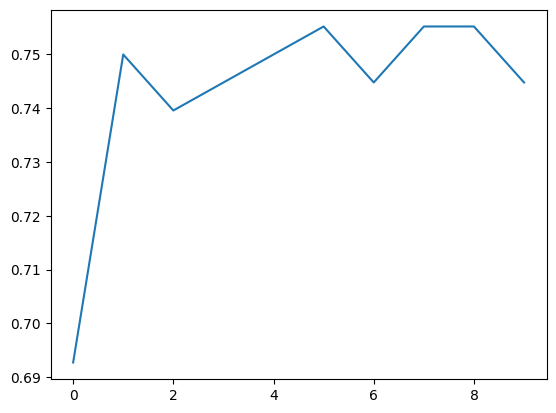

In [42]:
from sklearn.ensemble import RandomForestClassifier
## Finding out the right number of estimators
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
plt.plot(accuracy_scores)

Maximum test accuracy is achieved using 500 trees

In [43]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 74.48%
_______________________________________________
F1 Score: 0.6
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.779412   0.660714  0.744792    0.720063      0.737991
recall       0.848000   0.552239  0.744792    0.700119      0.744792
f1-score     0.812261   0.601626  0.744792    0.706943      0.738

Here also the model has overfitted, but the test accuracy has increased to 74%. And 50 wrong predictions are being made. We can also observe that the precision, recall and F1 score is less for the diabetic people. This means that there is a lack of training instances for the outcome '1'. We will be using Cross Validation later in the notebook

In [44]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

###KNN

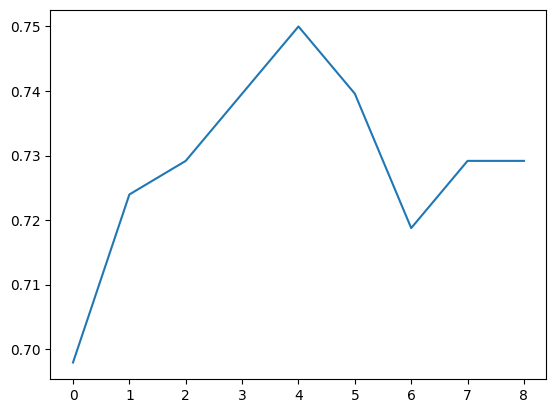

In [45]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(accuracy_scores)

In [46]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 81.25%
_______________________________________________
F1 Score: 0.72
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.841432    0.751351    0.8125    0.796392      0.809998
recall       0.877333    0.691542    0.8125    0.784438      0.812500
f1-score     0.859008    0.720207    0.8125    0.789608      0.810572
support    375.000000  201.000000    0.8125  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[329  46]
 [ 62 139]]

Test Result:
Accuracy Score: 72.92%
_______________________________________________
F1 Score: 0.59
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.774436   0.627119  0.729167    0.700777      0.723028
recall       0.824000   0.552239  0.729167    0.688119      0.729167
f1-score  

In [47]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

###XGBoost

In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.15)
xgb.fit(X_train, y_train)

evaluation(xgb, X_train, y_train, X_test, y_test, True)
evaluation(xgb, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]

Test Result:
Accuracy Score: 76.04%
_______________________________________________
F1 Score: 0.63
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.796992   0.677966  0.760417    0.737479      0.755457
recall       0.848000   0.597015  0.760417    0.722507      0.760417
f1-score     0.821705   0.634921  0.760417    0.728313      0.756

In [49]:
train_score_xgb = round(accuracy_score(y_train, xgb.predict(X_train)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(X_test)) * 100, 2)

In [50]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn, train_score_xgb],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn, test_score_xgb]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor', 'XGBoost'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,78.99,72.40
Decision Tree Classifier,100.00,67.71
Random Forest Classifier,100.00,74.48
K-Nearest Neighbor,81.25,72.92
XGBoost,100.00,76.04


We can observe from the above dataframe that Decision Tree Classifier, Random Forest Classifier, and XGBoost have all overfitted the given dataset. Let's explore the results when we use Cross Validation.

##Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

kfold = StratifiedKFold(n_splits=10)

random_state = 0
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state, n_estimators = 500))
classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression","Decision Tree",
"Random Forest", "KNeighboors", "XGBoosting"]})
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.783091,0.035100,Logistic Regression
1,0.701270,0.046378,Decision Tree
2,0.750121,0.048499,Random Forest
3,0.757139,0.053968,KNeighboors
4,0.744676,0.042400,XGBoosting


From the above table, we can observe that we get the best results for Logistic Regression Algorithm, the accuracy in the case is 78.3%. The Results for Random Forest and KNeighbors Classifer is also not bad. Let's try out Hyperparameter Tuning using GridSearchCv for Random Forest Classifier and XGBoost Classifier

##Hyperparameter Tuning

####Random Forest Classifier

In [57]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.7742891712038718

By Hyperparameters tuning, we get the best accuracy as 77% and the hyperparameters that give the best result are shown below.

####XGBoost Classifier

In [58]:
# XGBoosting Classifier tunning

XGB = XGBClassifier(verbosity = 0)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gsXGB = GridSearchCV(XGB, param_grid = gb_param_grid, cv=kfold, scoring="accuracy")

gsXGB.fit(X_train,y_train)

XGB_best = gsXGB.best_estimator_
# Best score
gsXGB.best_score_

0.7727162734422264

##**Conclusion**

1. The number of pregnancies is high for the diabetic people.
2. The median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.
3. The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.
4. The Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.
5. The Insulin level is more in Diabetic people compare to non diabetic people.
6. As the age increases, generally the Blood Pressure also increases
7. As the Insulin increases the Glucose level increases.
#####**Conclusion from ML model**
##### We got the best results for Logistic Regression Algorithm, the accuracy in this case is 78.3%. The Results for Random Forest(75%) and KNeighbors Classifer(75.7%) is also not bad